In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
#Get model metrics with tensorboard
from tensorflow.keras.callbacks import TensorBoard
import time
import cv2
import matplotlib.pyplot as plt

In [10]:
NAME = "Cat-Dog-CNN-64-{}".format(int(time.time()))

In [15]:
tensorboard = TensorBoard(log_dir = 'logs\{}'.format(NAME))

In [12]:
X = pickle.load(open('X.pickle','rb'))
y = pickle.load(open('y.pickle','rb'))

In [13]:
X = X / 255.0

In [ ]:
layer_size = 64

In [16]:

model = Sequential()
#3,3 is the window; input is the shape of the images
model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layers are 2d and we need a 1d dataset for the final layer
model.add(Flatten())
model.add(Dense(layer_size))
model.add(Activation("relu"))

#Add output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy'
             , optimizer = 'adam'
             , metrics = ['accuracy'])

model.fit(X,y, batch_size = 10, validation_split = 0.1, epochs = 3, callbacks = [tensorboard])


Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 231s 10ms/sample - loss: 0.6089 - acc: 0.6595 - val_loss: 0.5033 - val_acc: 0.7531
Epoch 2/3
22451/22451 [==============================] - 236s 10ms/sample - loss: 0.4705 - acc: 0.7770 - val_loss: 0.4589 - val_acc: 0.7860
Epoch 3/3
22451/22451 [==============================] - 225s 10ms/sample - loss: 0.4006 - acc: 0.8186 - val_loss: 0.4475 - val_acc: 0.7868


In [17]:
model.save(NAME)

In [33]:
#Make prediction
CATEGORIES = ["Dog","Cat"]

def prepare(filepath):
    IMG_SIZE = 100 # This has to be the same shape of the previous image
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,1)



In [39]:
path = '''heavy_breathing.jpg'''
prediction = model.predict([prepare(path)])
print(CATEGORIES[int(prediction[0][0])])

Dog


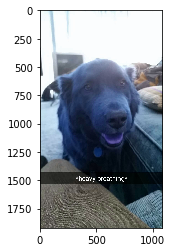

In [41]:
path ="heavy_breathing.jpg"
img_array = cv2.imread(path)
plt.imshow(img_array)
plt.show()